<a href="https://colab.research.google.com/github/yuto-sb/my-repository/blob/main/GCI%E3%82%B3%E3%83%B3%E3%83%9A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [248]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [249]:
path =  '/content/drive/MyDrive/02.コンペ1（10 28公開済）/'

df = pd.read_csv(path + 'data/train.csv')
df_test = pd.read_csv(path + 'data/test.csv')

In [250]:
df.head(10)

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,1,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,1,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [251]:
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [252]:
df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [253]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# --- 前処理 (replace推奨) ---
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].replace({'male': 0, 'female': 1})

features = ['Pclass', 'Sex', 'SibSp', 'Parch']

# --- 改善ポイント: 学習用とテスト用を縦に結合して、使えるデータを全部使う ---
# 全データを作成
df_all = pd.concat([df, df_test], sort=False)

# Ageが「ある」人全員（学習データ + テストデータ）-> これで先生(モデル)を育てる
known_age_all = df_all[df_all['Age'].notnull()]

# Ageが「ない」人（後で予測する対象）
unknown_age_df = df[df['Age'].isnull()]
unknown_age_test = df_test[df_test['Age'].isnull()]

# --- モデル学習 ---
# 先生(モデル)に渡すデータが増えるので、より賢くなる！
rf_model = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rf_model.fit(known_age_all[features], known_age_all['Age'])

# --- 予測と代入 ---
# df の欠損を埋める
predicted_ages_df = rf_model.predict(unknown_age_df[features])
df.loc[df['Age'].isnull(), 'Age'] = predicted_ages_df

# df_test の欠損を埋める
predicted_ages_test = rf_model.predict(unknown_age_test[features])
df_test.loc[df_test['Age'].isnull(), 'Age'] = predicted_ages_test

# 確認
print("Train欠損数:", df['Age'].isnull().sum())
print("Test欠損数:", df_test['Age'].isnull().sum())

Train欠損数: 0
Test欠損数: 0


In [254]:
df

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,3,0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,1,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S
887,888,0,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S
888,889,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,16.906145,1,2,W./C. 6607,23.4500,S
889,890,0,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C


In [255]:
# ------------ Surname ------------
# NameからSurname(苗字)を抽出
df['Surname'] = df['Name'].map(lambda name:name.split(',')[0].strip())
df_test['Surname'] = df_test['Name'].map(lambda name:name.split(',')[0].strip())

# 同じSurname(苗字)の出現頻度をカウント(出現回数が2以上なら家族)
df['FamilyGroup'] = df['Surname'].map(df['Surname'].value_counts())
df_test['FamilyGroup'] = df_test['Surname'].map(df_test['Surname'].value_counts())


In [256]:
# 家族で16才以下または女性の生存率
Female_Child_Group=df.loc[(df['FamilyGroup']>=2) & ((df['Age']<=16) | (df['Sex']==1))]
Female_Child_Group=Female_Child_Group.groupby('Surname')['Perished'].mean()
print(Female_Child_Group.value_counts())


Perished
0.000000    77
1.000000    27
0.250000     2
0.500000     1
0.857143     1
0.666667     1
Name: count, dtype: int64


In [257]:
# 家族で16才超えかつ男性の生存率
Male_Adult_Group=df.loc[(df['FamilyGroup']>=2) & (df['Age']>16) & (df['Sex']==0)]
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Perished'].mean()
print(Male_Adult_List.value_counts())


Perished
1.000000    76
0.000000    14
0.500000     6
0.666667     2
0.750000     1
Name: count, dtype: int64


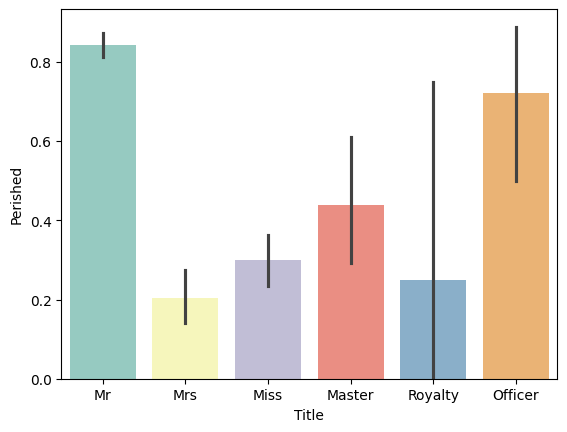

In [258]:
# ------------ Name --------------
# Nameから敬称(Title)を抽出し、グルーピング
df['Title'] = df['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer', inplace=True)
df['Title'].replace(['Don', 'Sir',  'the Countess', 'Lady', 'Dona'], 'Royalty', inplace=True)
df['Title'].replace(['Mme', 'Ms'], 'Mrs', inplace=True)
df['Title'].replace(['Mlle'], 'Miss', inplace=True)
df['Title'].replace(['Jonkheer'], 'Master', inplace=True)
sns.barplot(x='Title', y='Perished', data=df, palette='Set3')

df_test['Title'] = df_test['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df_test['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer', inplace=True)
df_test['Title'].replace(['Don', 'Sir',  'the Countess', 'Lady', 'Dona'], 'Royalty', inplace=True)
df_test['Title'].replace(['Mme', 'Ms'], 'Mrs', inplace=True)
df_test['Title'].replace(['Mlle'], 'Miss', inplace=True)
df_test['Title'].replace(['Jonkheer'], 'Master', inplace=True)



In [259]:
Dead_list=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==1)].index)
Survived_list=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==0)].index)

# デッドリストとサバイブリストの表示
print('Dead_list = ', Dead_list)
print('Survived_list = ', Survived_list)

# デッドリストとサバイブリストをSex, Age, Title に反映させる
df.loc[(df['Perished'].isnull()) & (df['Surname'].apply(lambda x:x in Dead_list)),\
             ['Sex','Age','Title']] = ['male',28.0,'Mr']
df.loc[(df['Perished'].isnull()) & (df['Surname'].apply(lambda x:x in Survived_list)),\
             ['Sex','Age','Title']] = ['female',5.0,'Mrs']
df_test.loc[(df['Perished'].isnull()) & (df_test['Surname'].apply(lambda x:x in Dead_list)),\
             ['Sex','Age','Title']] = ['male',28.0,'Mr']
df_test.loc[(df['Perished'].isnull()) & (df_test['Surname'].apply(lambda x:x in Survived_list)),\
             ['Sex','Age','Title']] = ['female',5.0,'Mrs']

Dead_list =  {'Sage', 'Goodwin', 'Cacic', 'Johnston', 'Turpin', 'Vander Planke', 'Panula', 'Lobb', 'Arnold-Franchi', 'Attalah', 'Boulos', 'Oreskovic', 'Zabour', 'Danbom', 'Elias', 'Rice', 'Barbara', 'Van Impe', 'Olsson', 'Jussila', 'Palsson', 'Bourke', 'Ford', 'Rosblom', 'Lefebre', 'Strom', 'Skoog'}
Survived_list =  {'Jussila', 'Dick', 'Nakid', 'Bishop', 'Frauenthal', 'Daly', 'Beckwith', 'McCoy', 'Duff Gordon', 'Chambers', 'Taylor', 'Beane', 'Moubarek', 'Goldenberg'}


In [260]:
# ----------- Family -------------
# Family = SibSp + Parch + 1 を特徴量とし、グルーピング
df['Family']=df['SibSp']+df['Parch']+1
df.loc[(df['Family']>=2) & (df['Family']<=4), 'Family_label'] = 2
df.loc[(df['Family']>=5) & (df['Family']<=7) | (df['Family']==1), 'Family_label'] = 1  # == に注意
df.loc[(df['Family']>=8), 'Family_label'] = 0

df_test['Family']=df_test['SibSp']+df_test['Parch']+1
df_test.loc[(df_test['Family']>=2) & (df_test['Family']<=4), 'Family_label'] = 2
df_test.loc[(df_test['Family']>=5) & (df_test['Family']<=7) | (df_test['Family']==1), 'Family_label'] = 1  # == に注意
df_test.loc[(df_test['Family']>=8), 'Family_label'] = 0


In [261]:
df.head(10)

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname,FamilyGroup,Title,Family,Family_label
0,1,1,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Braund,2,Mr,2,2.0
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,Cumings,1,Mrs,2,2.0
2,3,0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,1,Miss,1,1.0
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Futrelle,2,Mrs,2,2.0
4,5,1,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,Allen,2,Mr,1,1.0
5,6,1,3,"Moran, Mr. James",0,28.421211,0,0,330877,8.4583,Q,Moran,3,Mr,1,1.0
6,7,1,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,S,McCarthy,1,Mr,1,1.0
7,8,1,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,S,Palsson,4,Master,5,1.0
8,9,0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,S,Johnson,6,Mrs,3,2.0
9,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,C,Nasser,2,Mrs,2,2.0


In [262]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname,FamilyGroup,Title,Family,Family_label
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,Q,Kelly,1,Mr,1,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,S,Wilkes,1,Mrs,2,2.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,Q,Myles,1,Mr,1,1.0
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,S,Wirz,1,Mr,1,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,S,Hirvonen,1,Mrs,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,28.421211,0,0,A.5. 3236,8.0500,S,Spector,1,Mr,1,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C,Oliva y Ocana,1,Royalty,1,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,1,Mr,1,1.0
416,1308,3,"Ware, Mr. Frederick",0,28.421211,0,0,359309,8.0500,S,Ware,4,Mr,1,1.0


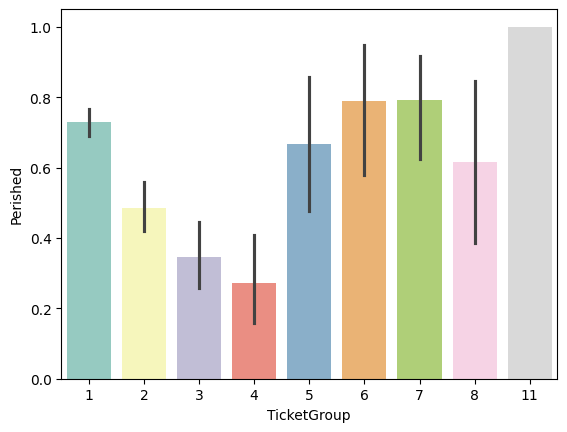

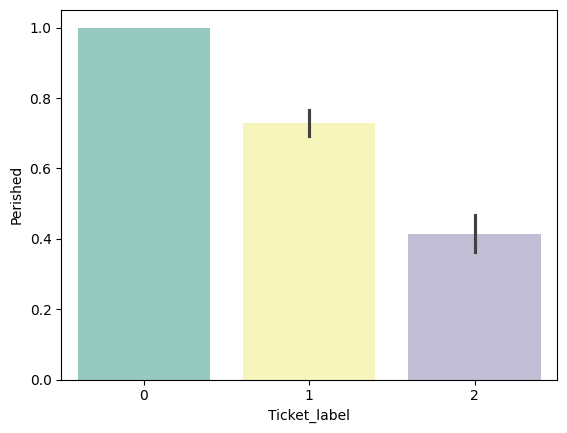

In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 全データ（Train + Test）でチケットの出現回数を数える
# concatで縦につなげて、Ticket列だけを取り出します
all_ticket_counts = pd.concat([df['Ticket'], df_test['Ticket']]).value_counts().to_dict()

# 2. 辞書を使って、df と df_test の両方にマッピング
df['TicketGroup'] = df['Ticket'].map(all_ticket_counts)
df_test['TicketGroup'] = df_test['Ticket'].map(all_ticket_counts)

# --- ここで可視化（dfのみ） ---
# テストデータには 'Perished' がないので、グラフは df だけで描きます
sns.barplot(x='TicketGroup', y='Perished', data=df, palette='Set3')
plt.show()

# 3. ラベル付け（グルーピング）の処理
# 両方に同じ処理をするので、ループで回すとミスが減ります
for data in [df, df_test]:
    # 初期値を設定（条件に当てはまらないものがNaNにならないように）
    data['Ticket_label'] = 0

    # 条件分岐
    # 2〜4人: 生存率高い (2)
    data.loc[(data['TicketGroup'] >= 2) & (data['TicketGroup'] <= 4), 'Ticket_label'] = 2

    # 5〜8人 または 1人: 生存率ふつう/低い (1)
    data.loc[(data['TicketGroup'] >= 5) & (data['TicketGroup'] <= 8) | (data['TicketGroup'] == 1), 'Ticket_label'] = 1

    # 11人以上: 生存率激低 (0)
    # (条件に漏れた 9, 10人なども初期値0でカバーされます)
    data.loc[(data['TicketGroup'] >= 11), 'Ticket_label'] = 0

# --- 結果の可視化 ---
sns.barplot(x='Ticket_label', y='Perished', data=df, palette='Set3')
plt.show()


In [264]:
df

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname,FamilyGroup,Title,Family,Family_label,TicketGroup,Ticket_label
0,1,1,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Braund,2,Mr,2,2.0,1,1
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,Cumings,1,Mrs,2,2.0,2,2
2,3,0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,1,Miss,1,1.0,1,1
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Futrelle,2,Mrs,2,2.0,2,2
4,5,1,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,Allen,2,Mr,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S,Montvila,1,Officer,1,1.0,1,1
887,888,0,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S,Graham,3,Miss,1,1.0,1,1
888,889,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,16.906145,1,2,W./C. 6607,23.4500,S,Johnston,2,Miss,4,2.0,4,2
889,890,0,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C,Behr,1,Mr,1,1.0,1,1


In [265]:
# ----------- Fare -------------
# 欠損値を Embarked='S', Pclass=3 の平均値で補完
fare=df_test.loc[(df_test['Embarked'] == 'S') & (df_test['Pclass'] == 3), 'Fare'].median()
df_test['Fare']=df_test['Fare'].fillna(fare)


In [266]:
# ------------- 前処理 ---------------
# 推定に使用する項目を指定
df = df[['Perished','Pclass','Sex','Age','Fare','Embarked','Title','Family_label','Ticket_label']]
df_test = df_test[['Pclass','Sex','Age','Fare','Embarked','Title','Family_label','Ticket_label']]
# ラベル特徴量をワンホットエンコーディング
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)
df_test

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_test = df_test.iloc[:, 0:].values
k = df_test.values

In [267]:
df_test.iloc[:, 0:]

,Pclass,Age,Fare,Family_label,Ticket_label,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,34.500000,7.8292,1.0,1,True,False,False,True,False,False,False,True,False,False,False
1,3,47.000000,7.0000,2.0,1,False,True,False,False,True,False,False,False,True,False,False
2,2,62.000000,9.6875,1.0,1,True,False,False,True,False,False,False,True,False,False,False
3,3,27.000000,8.6625,1.0,1,True,False,False,False,True,False,False,True,False,False,False
4,3,22.000000,12.2875,2.0,2,False,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.421211,8.0500,1.0,1,True,False,False,False,True,False,False,True,False,False,False
414,1,39.000000,108.9000,1.0,2,False,True,True,False,False,False,False,False,False,False,True
415,3,38.500000,7.2500,1.0,1,True,False,False,False,True,False,False,True,False,False,False
416,3,28.421211,8.0500,1.0,1,True,False,False,False,True,False,False,True,False,False,False


In [268]:
df_test

,Pclass,Age,Fare,Family_label,Ticket_label,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,34.500000,7.8292,1.0,1,True,False,False,True,False,False,False,True,False,False,False
1,3,47.000000,7.0000,2.0,1,False,True,False,False,True,False,False,False,True,False,False
2,2,62.000000,9.6875,1.0,1,True,False,False,True,False,False,False,True,False,False,False
3,3,27.000000,8.6625,1.0,1,True,False,False,False,True,False,False,True,False,False,False
4,3,22.000000,12.2875,2.0,2,False,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.421211,8.0500,1.0,1,True,False,False,False,True,False,False,True,False,False,False
414,1,39.000000,108.9000,1.0,2,False,True,True,False,False,False,False,False,False,False,True
415,3,38.500000,7.2500,1.0,1,True,False,False,False,True,False,False,True,False,False,False
416,3,28.421211,8.0500,1.0,1,True,False,False,False,True,False,False,True,False,False,False


In [269]:
X_test

array([[3, 34.5, 7.8292, ..., False, False, False],
       [3, 47.0, 7.0, ..., True, False, False],
       [2, 62.0, 9.6875, ..., False, False, False],
       ...,
       [3, 38.5, 7.25, ..., False, False, False],
       [3, 28.421210579818563, 8.05, ..., False, False, False],
       [3, 16.933814089935762, 22.3583, ..., False, False, False]],
      dtype=object)

In [270]:
k

array([[3, 34.5, 7.8292, ..., False, False, False],
       [3, 47.0, 7.0, ..., True, False, False],
       [2, 62.0, 9.6875, ..., False, False, False],
       ...,
       [3, 38.5, 7.25, ..., False, False, False],
       [3, 28.421210579818563, 8.05, ..., False, False, False],
       [3, 16.933814089935762, 22.3583, ..., False, False, False]],
      dtype=object)

In [271]:
# 各列の欠損値の数を表示
print(df_test.isnull().sum())

Pclass           0
Age              0
Fare             0
Family_label     0
Ticket_label     0
Sex_0            0
Sex_1            0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64


In [272]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 1. 【最優先】まずデータを分割します
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# =================================================
# 自動特徴量生成 (PolynomialFeatures)
# =================================================

# 2. 訓練データ(X_train)だけを見て、式の作り方を決める (fit)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

# 3. 決めた式を使って、訓練データと検証データを変換する (transform)
X_train_poly = poly.transform(X_train)
X_val_poly   = poly.transform(X_val)

# =================================================
# 特徴量選択 (SelectFromModel)
# =================================================

# 4. 訓練データ(X_train)だけを見て、重要度順に上位20個を選ぶ
selector = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=0),
    threshold=-np.inf, # 閾値を無限小にする（これで足切りを無効化）
    max_features=20    # 上位20個だけを取得
)

selector.fit(X_train_poly, y_train)

# 5. 選ばれた列だけを抽出する (transform)
X_train_new = selector.transform(X_train_poly)
X_val_new   = selector.transform(X_val_poly)

# --- 結果確認 ---
print(f"元の列数: {X_train.shape[1]}")
print(f"生成後の列数: {X_train_poly.shape[1]}")
print(f"選抜後の列数: {X_train_new.shape[1]}")

# このあと X_train_new, y_train でモデルを学習させます


元の列数: 16
生成後の列数: 152
選抜後の列数: 20


In [273]:
# 1. 訓練データと同じルールで、特徴量を増やす (transformのみ)
X_test_poly = poly.transform(k)

# 2. 訓練データと同じ基準で、20個を選抜する (transformのみ)
X_test_new = selector.transform(X_test_poly)

# 確認
print(f"テストデータの最終形状: {X_test_new.shape}")
# (行数, 20) になっていれば成功です！

テストデータの最終形状: (418, 20)


In [274]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# 必要なライブラリ（既にインポート済みなら不要）
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 1. パイプライン（処理のセット）を作ります
# 「生成」→「選抜」→「学習」をひとまとめにします
pipeline = make_pipeline(
    # ステップ1: 特徴量生成
    PolynomialFeatures(degree=2, include_bias=False),

    # ステップ2: 上位20個を選抜
    SelectFromModel(
        RandomForestClassifier(n_estimators=100, random_state=0),
        threshold=-np.inf,
        max_features=20
    ),

    # ステップ3: メインの学習モデル（ここではランダムフォレスト）
    RandomForestClassifier(n_estimators=100, random_state=0)
)

# 2. CVを実行します
# パイプラインに対して、まだ加工していない「元の X_train」を渡すのがポイントです。
# 内部で自動的に split → 生成 → 選抜 → 学習 が繰り返されます。
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

print(f"各回のスコア: {scores}")
print(f"平均スコア: {scores.mean()}")

各回のスコア: [0.81118881 0.81118881 0.81690141 0.73943662 0.83098592]
平均スコア: 0.8019403132079189


In [275]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
import numpy as np

# 1. パイプラインの作成（LightGBM版）
pipeline_lgbm = make_pipeline(
    # ステップ1: 特徴量を増やす（自動生成）
    PolynomialFeatures(degree=2, include_bias=False),

    # ステップ2: 重要な特徴量トップ20を選ぶ（審判役もLGBMにする）
    SelectFromModel(
        LGBMClassifier(n_estimators=100, random_state=0, verbose=-1),
        threshold=-np.inf,
        max_features=20
    ),

    # ステップ3: 選ばれた特徴量で学習する（メインモデル）
    LGBMClassifier(n_estimators=100, random_state=0, verbose=-1)
)

# 2. CV（交差検証）の実行
# X_train, y_train はさっきと同じものを使います
scores = cross_val_score(pipeline_lgbm, X_train, y_train, cv=5, scoring='accuracy')

print(f"各回のスコア: {scores}")
print(f"平均スコア: {scores.mean()}")

各回のスコア: [0.78321678 0.8041958  0.81690141 0.72535211 0.83098592]
平均スコア: 0.7921304048064611


In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline # make_pipelineではなくPipelineを使います

# 1. パイプラインの定義（ステップに名前を付けます）
# 名前を付けておくと、あとでパラメーターを指定しやすくなります
pipeline = Pipeline([
    # (名前, クラス) のセットで書きます
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('selection', SelectFromModel(
        LGBMClassifier(n_estimators=100, random_state=0, verbose=-1),
        threshold=-np.inf,
        max_features=20
    )),
    ('model', LGBMClassifier(random_state=0, verbose=-1))
])

# 2. 試したいパラメーターの辞書を作る
# 【重要】「ステップ名__パラメーター名」という形式で書きます（アンダースコア2つ）
param_grid = {
    # model（最後のLGBM）のパラメーター候補
    'model__n_estimators': [100, 300, 500],    # 木の数
    'model__learning_rate': [0.01, 0.05, 0.1], # 学習率
    'model__max_depth': [3, 5, 7],             # 木の深さ

    # 余裕があれば selection（特徴量選択）の数も探索できます
    # 'selection__max_features': [10, 20, 30]
}

# 3. グリッドサーチの設定
# cv=5 なので、1つの組み合わせにつき5回検証して確実性を高めます
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy', # 評価指標（正解率）
    n_jobs=-1,          # 並列処理（PCの全力を出す）
    verbose=1
)

# 4. 探索開始（時間がかかります）
grid_search.fit(X_train, y_train)

# --- 結果の確認 ---
print(f"ベストスコア: {grid_search.best_score_}")
print(f"ベストパラメーター: {grid_search.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
ベストスコア: 0.8272333300502315
ベストパラメーター: {'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 300}


In [277]:
path = '/content/drive/MyDrive/02.コンペ1（10 28公開済）/'

submission = pd.read_csv(path + 'gender_submission.csv')
submission

,PassengerId,Perished
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [278]:
pred = grid_search.predict(X_test_new)
pred.shape

(418,)

In [279]:
submission['Perished'] = pred
submission

,PassengerId,Perished
0,892,1
1,893,1
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [280]:
# Google Drive・Google Colaboratoryで作業する場合
submission.to_csv('submission.csv',index=False)

from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>